<a href="https://colab.research.google.com/github/edilsondesouza/dcc_ufmg_masters_edilson/blob/master/Grandes_Questoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


####Trabalho Final da Disciplina de Visualização de Dados 2020.1     
####UFMG - ICEX - PPGCC  
####Professora: Raquel C. e Melo Minardi
####Aluna: Sílvia Martins Guerra


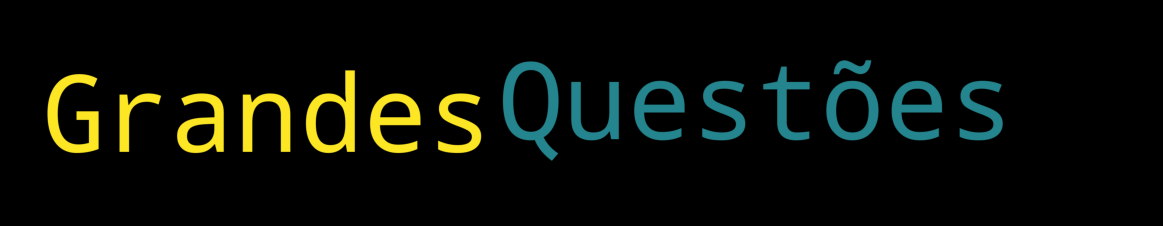

In [ ]:
#@title ######.
cloud = "Questões Grandes"
wordcloud = WordCloud(width = 3000,height = 500, collocations=False, background_color = 'black').generate(str(cloud))
fig = plt.figure(figsize = (20,5),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud)

Na esfera pública existem questões de grande impacto social que causam polêmica despertando reações intensas e polarização política. Essas são as que chamamos de Grandes Questões, temas que mobilizam movimentos sociais e posicionamentos que fazem fazem parte da formação de identidade das pessoas. Podemos citar como exemplos: aborto, capitalismo, casamento gay, impostos diversos, pena de morte, intervenção militar e liberação de drogas, entre outros.

Nesse trabalho examinamos essas questões e a relação que existe entre elas. Assumindo uma atitude analítica e curiosa, exploramos uma base de dados que foi extraída do site https://www.debate.org/ que contém dados com a opinião voluntária de diversos usuários da plataforma sobre grandes questões.


In [ ]:
#@title ######<sub><sup>(clique aqui para ver bibliotecas e ferramentas usadas)</sup></sub>
import numpy as np
import pandas as pd
import io
import wordcloud
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import sklearn
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy
import scipy.integrate as integrate
import scipy.cluster.hierarchy as shc 
from pylab import rcParams
import plotly.offline as py
import plotly.io as pio
import plotly.graph_objects as go 
from google.colab import drive
drive.mount('/content/drive')



O tramento dos dados incluíu verificar e eliminar instâncias com falhas ocoridas na captura dos dados, codificar corretamente os dados faltantes (as pessoas não necessariamente respondem à todas as questões). E unir em apenas uma variável as opções que significavam ausência de opinião à favor ou contra.

Cada questão ficou então com **3 categorias**:


*   Pro
*   Sem Opinião
*   Contra

Com o intuito de reduzir o número de questões que vamos analisar criamos visualizações que ajudaram na escolha de qual questão manter.

Começamos com uma nuvem de palavras com o peso por frequência de respostas tanto pro quanto contra para cada questão, para criarmos uma noção intuitiva das **questões mais polarizadas** da nossa base.



In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código do tratamento dos dados)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]
data = pd.read_csv('drive/My Drive/DADOS/debate_org_data/people_tbl.csv', delimiter=";")
data.rename({"Unnamed: 0" :"a"}, axis="columns", inplace=True)
data.drop(["a"], axis=1, inplace=True)
data.replace(to_replace=["N/S"], value=np.nan, inplace=True)
data = data.dropna(axis=0, how = "all")
data = data.dropna(axis=1, how = "all")
data.columns

translate = {'abortion':'aborto', 'affirmative_action':'ação afirmativa', 'animal_rights':'direito dos animais', 'barack_obama':'Barack Obama','border_fence':'muro na fronteira', 'capitalism':'capitalismo', 'civil_unions':'união civil', 'death_penalty':'pena de morte',
       'drug_legalization':'legalização de drogas', 'electoral_college':'colégio eleitoral', 'environmental_protection':'proteções ambientais','estate_tax':'imposto sob propriedade', 'european_union':'União Europeia', 'euthanasia':'eutanásia', 'federal_reserve':'Sistema de Reserva Federal',
       'flat_tax':'imposto fixo', 'free_trade':'livre-comércio', 'gay_marriage':'casamento gay', 'global_warming_exists':'existe aquecimento global','globalization':'globalização', 'gold_standard':'padrão-ouro', 'gun_rights':'direito à arma', 'homeschooling':'ensino domiciliar',
       'internet_censorship':'censura à internet', 'iran_iraq_war':'guerra do Iran e Iraque', 'labor_union':'sindicatos','legalized_prostitution':'legalização da prostituição', 'medicaid_medicare':'seguro de saúde', 'medical_marijuana':'maconha medicinal',
       'military_intervention':'intervenção militar', 'minimum_wage':'salário mínimo', 'national_health_care':'sistema público de saúde','national_retail_sales_tax':'imposto nacional sobre vendas de varejo', 'occupy_movement':'movimento Occupy', 'progressive_tax':'imposto progressivo',
       'racial_profiling':'discriminação racial', 'redistribution':'redistribuição de riqueza', 'smoking_ban':'leis antitabagistas', 'social_programs':'programas de assistência social',
       'social_security':'seguro social', 'socialism':'socialismo', 'stimulus_spending':'medidas de incentivo econômico', 'term_limits':'limites de mandato',
       'torture':'tortura', 'united_nations':'Nações Unidas', 'war_afghanistan':'guerra do Afeganistão', 'war_terror':'guerra ao terror','welfare':'bem estar social'}
trans_late = {'abortion':'aborto', 'affirmative_action':'ação_afirmativa', 'animal_rights':'direito_dos_animais', 'barack_obama':'Barack_Obama','border_fence':'muro_na_fronteira', 'capitalism':'capitalismo', 'civil_unions':'união_civil', 'death_penalty':'pena_de_morte',
       'drug_legalization':'legalização_de_drogas', 'electoral_college':'colégio_eleitoral', 'environmental_protection':'proteções_ambientais','estate_tax':'imposto_sob_propriedade', 'european_union':'União_Europeia', 'euthanasia':'eutanásia', 'federal_reserve':'Sistema_de_Reserva_Federal',
       'flat_tax':'imposto fixo', 'free_trade':'livre-comércio', 'gay_marriage':'casamento_gay', 'global_warming_exists':'existe_aquecimento_global','globalization':'globalização', 'gold_standard':'padrão-ouro', 'gun_rights':'direito_à_arma', 'homeschooling':'ensino_domiciliar',
       'internet_censorship':'censura_à_internet', 'iran_iraq_war':'guerra_do_Iran_e_Iraque', 'labor_union':'sindicatos','legalized_prostitution':'legalização_da_prostituição', 'medicaid_medicare':'seguro_de_saúde', 'medical_marijuana':'maconha_medicinal',
       'military_intervention':'intervenção_militar', 'minimum_wage':'salário_mínimo', 'national_health_care':'sistema_público_de_saúde','national_retail_sales_tax':'imposto_nacional_sobre_vendas_de_varejo', 'occupy_movement':'movimento_Occupy', 'progressive_tax':'imposto_progressivo',
       'racial_profiling':'discriminação_racial', 'redistribution':'redistribuição_de_riqueza', 'smoking_ban':'leis_antitabagistas', 'social_programs':'programas_de_assistência_social',
       'social_security':'seguro_social', 'socialism':'socialismo', 'stimulus_spending':'medidas_de_incentivo_econômico', 'term_limits':'limites_de_mandato',
       'torture':'tortura', 'united_nations':'Nações_Unidas', 'war_afghanistan':'guerra_do_Afeganistão', 'war_terror':'guerra_ao_terror','welfare':'bem_estar_social'}

def trans(sentence, transdict):
    words = sentence.split()
    trans = [transdict.get(w.lower(),w) for w in words]
    return (' '.join(trans))

def transL(list, transdict):
  tradução = []
  for words in list:
    t = [transdict.get(w.lower(),w) for w in words]
    tradução.append(t)
    return tradução

###<div align="right"><font color='teal'>Quais questões inspiraram mais posicionamento das pessoas?</font></div>
###<div align="right"><font color='teal'>O que elas tem em comum?</font></div>


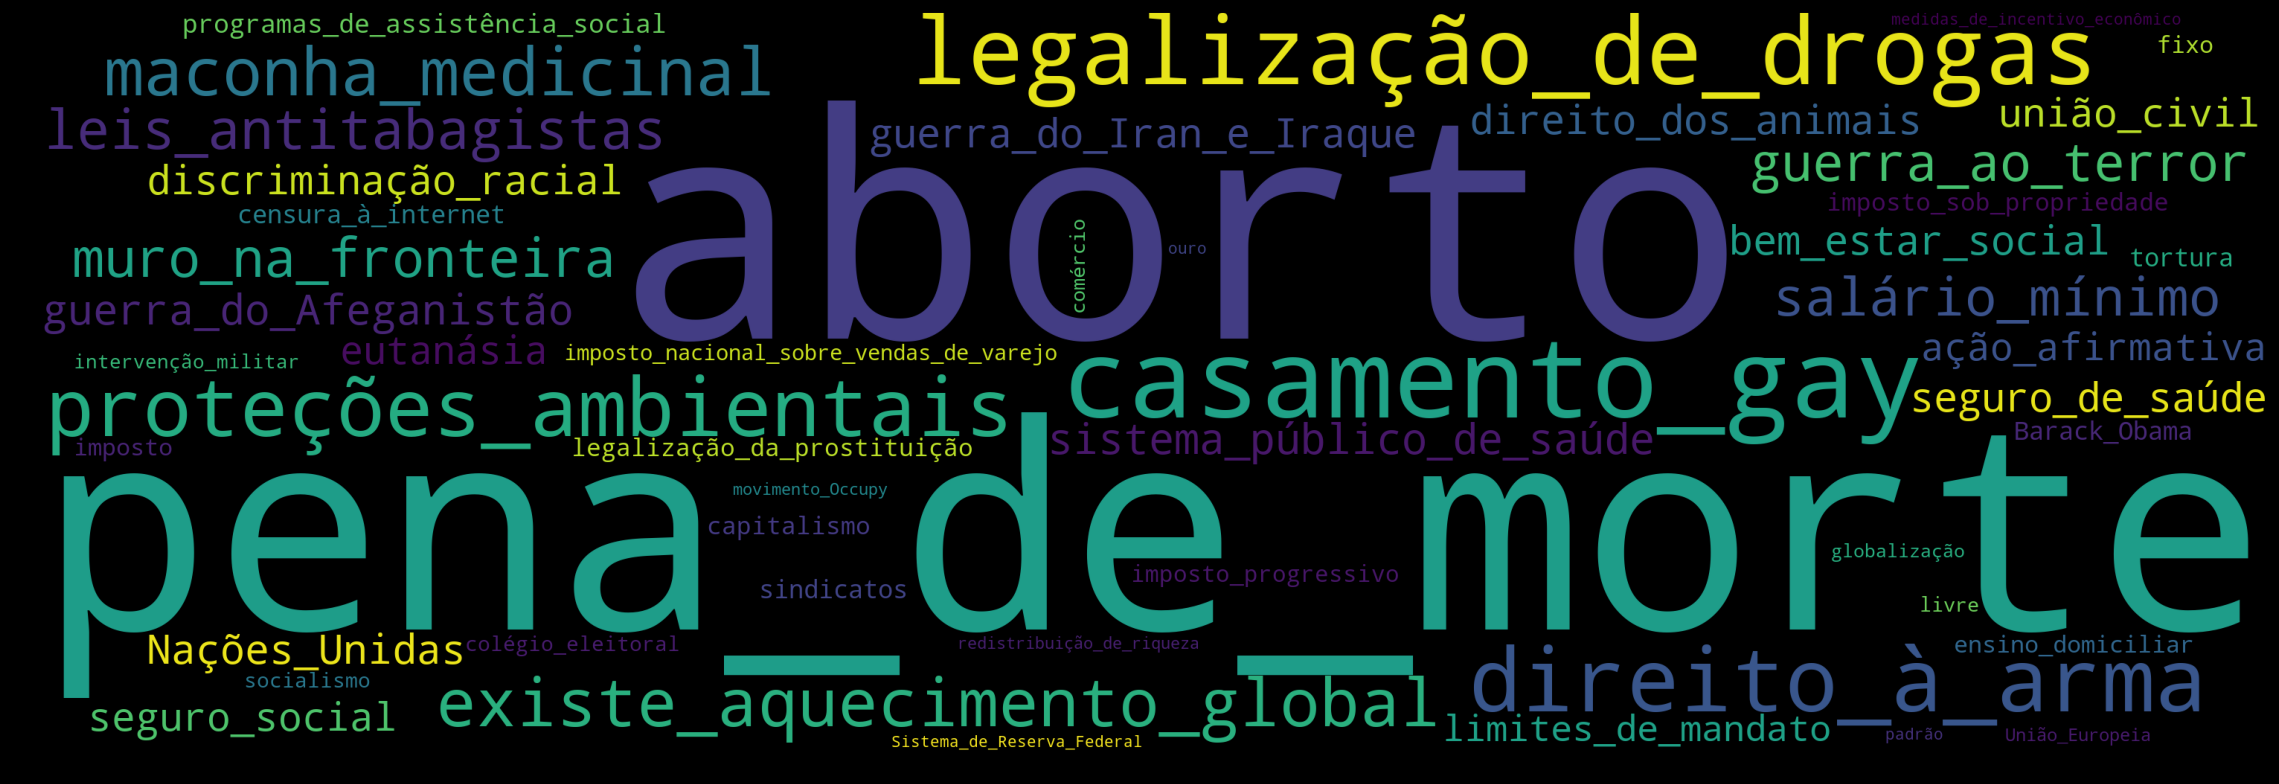

In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código da wordcloud com todas as grandes questões)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]
words = []
for col in data.columns:
  for i,row_value in data[col].iteritems():
    if data[col][i]=='Pro' or data[col][i]=='Con':
      words.append(str(col))
cloud = ' '.join(word for word in words)
cloud = trans(cloud,trans_late)
                        
wordcloud = WordCloud(width = 3000,height = 1000, collocations=False, background_color = 'black').generate(str(cloud))
fig = plt.figure(figsize = (40, 15),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud)

Como a inteção era trabalhar com casos completos (instâncias em que foram respondidas todas as questões), para que a base de dados utilizada não ficasse pequena avaliamos também com a ajuda de um Diagrama de Paretto quais eram as questões mais respondidas (somando as três categorias de respostas)

###<div align="right"><font color='teal'>Quais são questões mais respondidas?</font></div>
###<div align="right"><font color='teal'>Quantas questões compõe 80% (ou outro valor) da nossa base?</font></div>


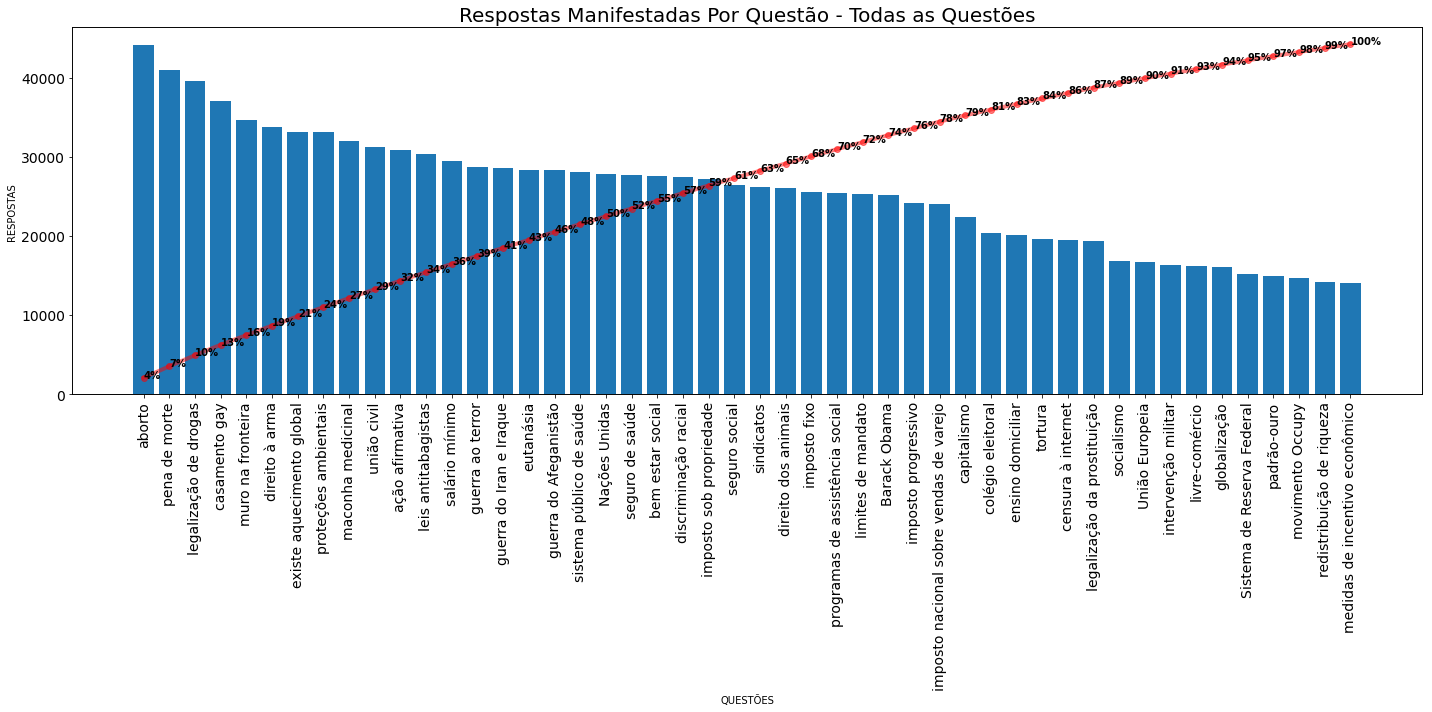

In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código do diagrama de pareto com todas as grandes questões)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]
plt.rcParams["figure.figsize"] = (20,10)
na_count = []
na_col = []
for i in data.columns:
  count = data[i].isna().sum()
  na_count.append(int(52796 - count))
  na_col.append(trans(i,translate))

def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = 'QUESTÕES'
    ylabel ='RESPOSTAS'
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    #ax1.tick_params(rotation=90)
    plt.xticks(rotation=90);
    ax1.set_ylabel(ylabel)
    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
    
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] =14

    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt,(x[i],cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title,fontsize=20)
    
    plt.tight_layout()
    plt.show()

n_respostas_df = pd.DataFrame(list(zip(na_count, na_col)),
              columns=['respostas','issue'])

pareto_plot(n_respostas_df, x='issue', y='respostas', title='Respostas Manifestadas Por Questão - Todas as Questões')


Escolhemos então 20 questões levando em consideração tanto a relevência contextual dessas questões quanto o seu total de respondentes. E comparamos mais uma vez com a ajuda de um Diagrama de Paretto a popularidade das questões selecionadas.

###<div align="right"><font color='teal'>Quais as questões mais populares na base selecionada?</font></div>

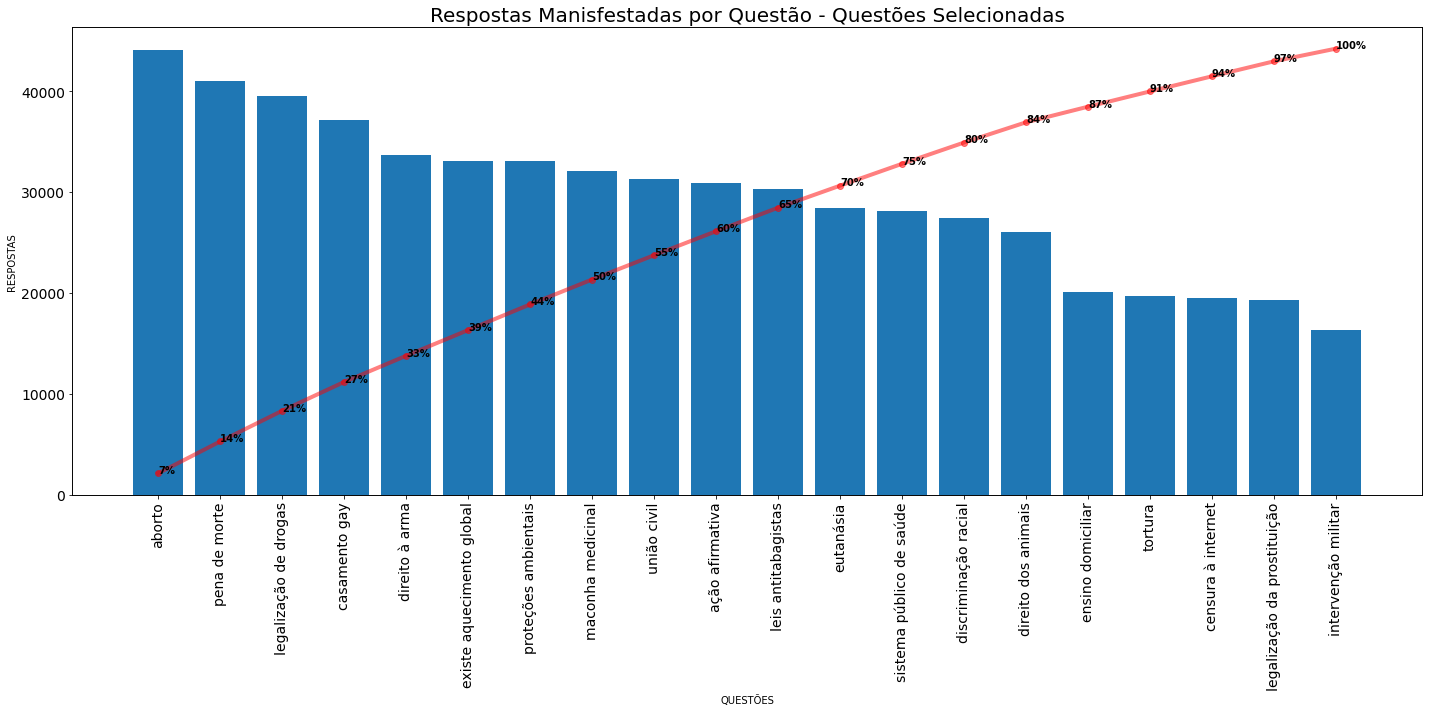

Tamanho da base com os casos completos das variáveis escolhidas:  (10610, 20)


In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código do diagrama de pareto com as grandes questões selecionadas)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]
manter = ['abortion','death_penalty', 'drug_legalization','gay_marriage','gun_rights','global_warming_exists', 'environmental_protection','medical_marijuana',
          'affirmative_action','euthanasia','national_health_care','racial_profiling','animal_rights','homeschooling','torture','internet_censorship','military_intervention','smoking_ban','civil_unions','legalized_prostitution']
issues = data
excluir=[]
for c in data.columns:
  if c not in manter:
    excluir.append(c)

for v in excluir:
  issues.drop(v, axis='columns', inplace=True)
na_count = []
na_col = []

for i in issues.columns:
  count = data[i].isna().sum()
  na_count.append(int(52796 - count))
  na_col.append(trans(i,translate))
  
n_respostas_df = pd.DataFrame(list(zip(na_count, na_col)), columns=['respostas','issue'])

pareto_plot(n_respostas_df, x='issue', y='respostas', title='Respostas Manisfestadas por Questão - Questões Selecionadas')
issues = issues.replace('Und', 'N/O')
issues_complete = issues.dropna(how = "any")
issuesN = issues
print('Tamanho da base com os casos completos das variáveis escolhidas: ', issues_complete.shape)

     

Dessas questões selecionadas mantivemos apenas os casos completos, em que todas as questões selecionadas foram respondidas. Reduzimos então a nossa base de aproximadamente 64.000 instâncias para 10.610 instâncias.

Então para ter uma noção intuitiva da polarização dessas questões na nossa base selecionada, utilizamos mais uma vez uma nuvem de palavras com o peso sendo o total de respostas pro e contra em cada questão.

###<div align="right"><font color='teal'>Quais as questões despertam maior envolvimento?</font></div>
###<div align="right"><font color='teal'>Qual a diferença entre o peso de cada questão?</font></div>

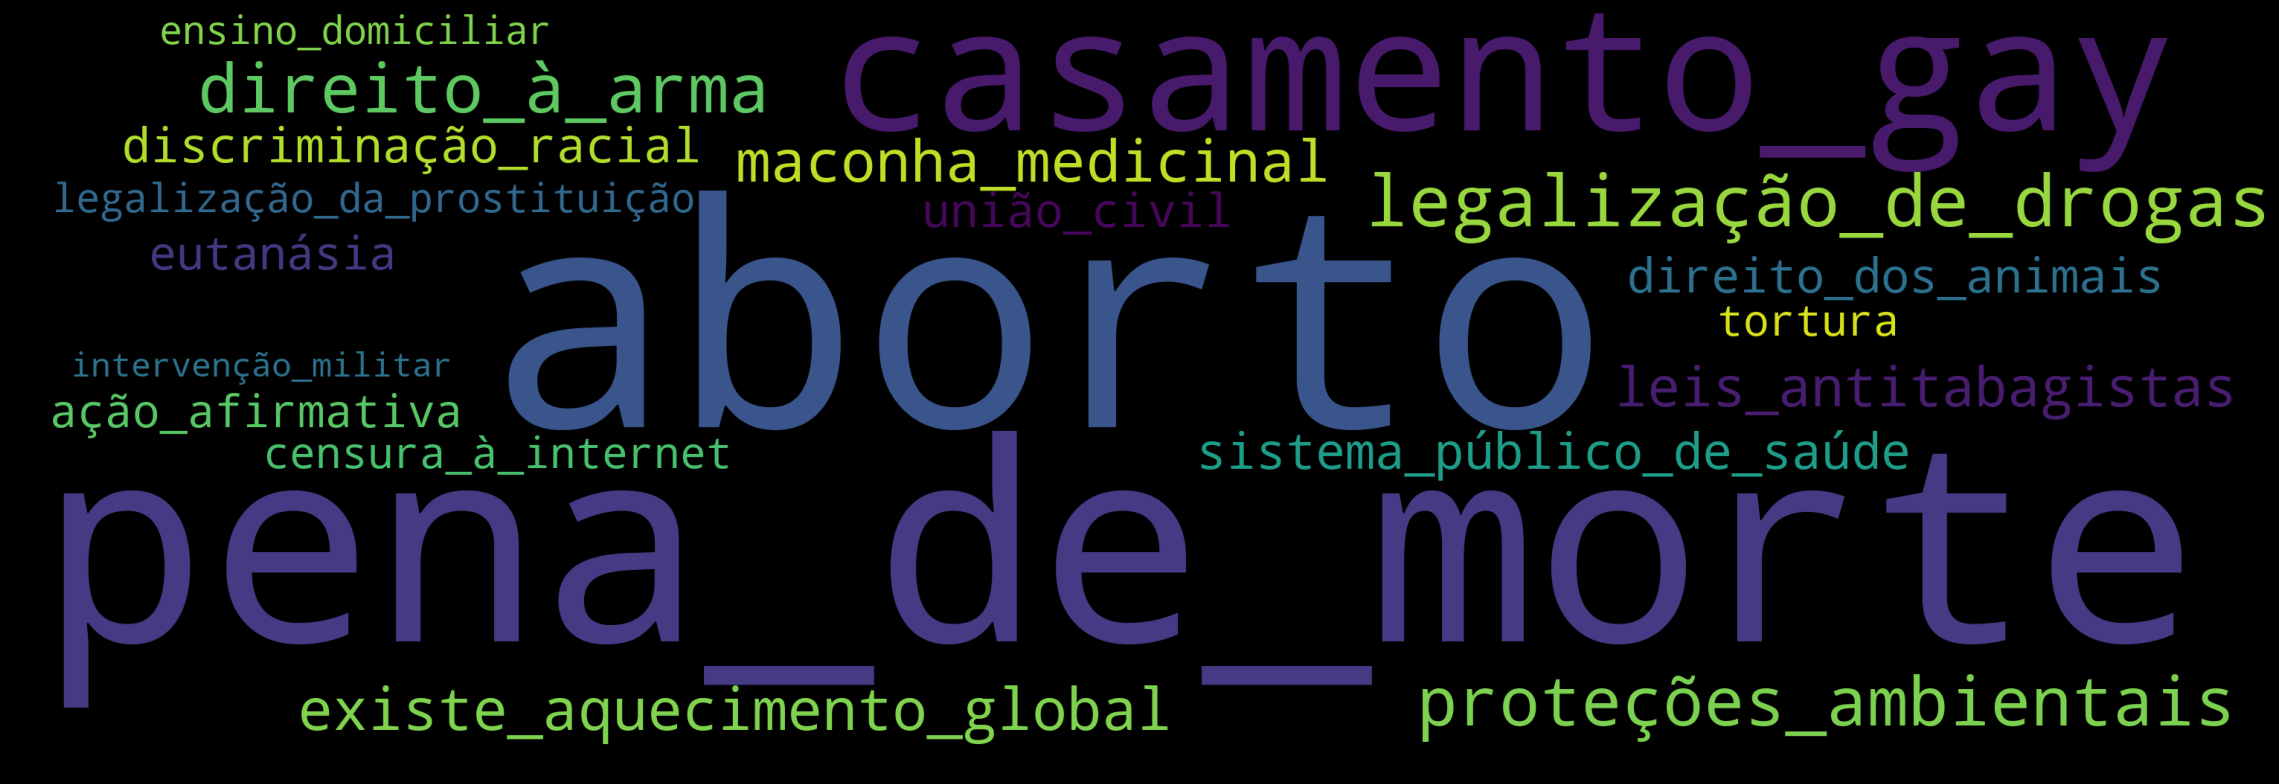

In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código da wordcloud com as grandes questões selecionadas)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]


words = []
pdissues = pd.DataFrame(issues)
pdissues.head()
for col in pdissues.columns:
  for i,row_value in pdissues[col].iteritems():
    if pdissues[col][i]=='Pro' or pdissues[col][i]=='Con':
      words.append(str(col))
cloud = ' '.join(word for word in words)
cloud = trans(cloud,trans_late)
                        
wordcloud = WordCloud(width = 3000,height = 1000, collocations=False, background_color = 'black').generate(str(cloud))
fig = plt.figure(figsize = (40, 15),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud)

Para comparar a frequência das categorias de cada questão plotamos um gráfico de barras interativo:

*  É possivel explorar a soma das frequências das categorias e a relação parte todo com as barras empilhadas e mudar para barras agrupadas para buscar diferentes insights
*  Levando o mouse ao canto direito superior uma barra de ferramentas aparece com as opções de aproximar ou selecionar parte do gráfico.
* Também é possível selecionar ou excluir categorias.


###<div align="right"><font color='teal'>Como podemos comparar as categorias das questões?</font></div>
###<div align="right"><font color='teal'>Quais as questões mais se assemelham ou não na relação parte-todo das categorias?</font></div>
###<div align="right"><font color='teal'>O que a categoria "sem opinião" nos informa? Ela parece relevante?</font></div>


In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código do gráfico de barras empilhadas e agrupadas)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]

issues = issues_complete
count_pro = []
count_con = []
count_no = []
issue_col = []
for i in issues.columns:
  pro = issues[i].value_counts()['Pro']
  con = issues[i].value_counts()['Con']
  no = issues[i].value_counts()['N/O']
  count_pro.append(pro)
  count_con.append(con)
  count_no.append(no)
  t = trans(i,translate)
  issue_col.append(t)

total =106.1
count_prop = [float("{:.1f}".format(x/total)) for x in count_pro]
count_conp = [float("{:.1f}".format(x/total)) for x in count_con]
count_nop = [float("{:.1f}".format(x/total)) for x in count_no]
pro_con_no = pd.DataFrame(list(zip(issue_col,count_prop,count_conp,count_nop)),
              columns=['questões','pro','contra','sem opinião'])

df_1 = pro_con_no.sort_values('pro', ascending=True)
df_2 = pro_con_no.sort_values('contra', ascending=True)
labels = ["ordem_pro", "ordem_contra"]

x = pro_con_no['questões']
fig = go.Figure(go.Bar(x=x, y=pro_con_no['pro'], name='Pro', marker_color='royalblue'))
fig.add_trace(go.Bar(x=x, y=pro_con_no['contra'], name='Contra', marker_color='red'))
fig.add_trace(go.Bar(x=x, y=pro_con_no['sem opinião'], name='Sem Opinião', marker_color='mediumseagreen'))
fig.layout.plot_bgcolor = 'rgba(0,0,0,0)'
fig.layout.paper_bgcolor = 'rgba(0,0,0,0)'
fig.update_layout(barmode='stack', xaxis={'categoryorder':'array', 'categoryarray':issue_col})
fig.update_yaxes(tickvals=[10,20,30,40,50,60,70,80,90,100],showgrid=True,gridwidth=1,gridcolor = 'lightgrey',zeroline=False,ticksuffix="%")
fig.update_layout(title="Categorias - Grandes Questões",font=dict(size=16))


fig.update_layout(updatemenus=[dict(buttons=list([dict(args=["barmode", "stack"],label=" barras empilhadas", method="relayout" ),
                                                  dict(args=["barmode", "group"],label="barras agrupadas",method="relayout")]),
            direction="down",pad={"r": 10, "t": 10},showactive=True,x = 1.13,xanchor="right",y=1.15,yanchor="top"),])
fig.show()

Para verificar a relação de ranqueamentos entre as categorias criamos 3 gráficos para serem estudados e comparados. Em cada gráfico as questões foram ordemadas de acordo com uma categoria e é possível alternar entre as outras duas categorias para observar o formato dos dados nessa condição. 
Mais opções para explorar os gráficos aparecem na barra do lado superior direito dos gráficos.

###<div align="right"><font color='teal'>Quando as questões estão ordenadas por uma categoria existe algum padrão significativo nas outras?</font></div>
###<div align="right"><font color='teal'>O que podemos aprender com o formato dos dados?</font></div>
###<div align="right"><font color='teal'>O que podemos observar a respeito das primeiras e ultimas questões de cada raking?</font></div>
###<div align="right"><font color='teal'>Escolhendo uma questão e verificando como ela se posiciona nos rankings o que podemos notar?</font></div>

In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código do ranking das questões pelo pro)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]

count_con_neg = []
for i in range(0,len(count_con)): 
  count_con_neg.append(0 - count_con[i])

count_no_neg = []
for i in range(0,len(count_con)): 
  count_no_neg.append(0 - count_no[i])


pro_con = pd.DataFrame(list(zip(issue_col,count_pro,count_con_neg,count_no_neg,count_no,count_con)),columns=['issues','pro','con','no','no_p','con_p'])

tmp = pro_con.sort_values('pro', ascending=True)
pro = tmp['pro'].values
issues = tmp['issues'].values
con = tmp['con'].values
no = tmp['no'].values

y = list(range(0, 8000, 1000))
layout = go.Layout(yaxis=go.layout.YAxis(title='Issues'),
                   xaxis=go.layout.XAxis(
                       range=[-8600, 8500],
                       tickvals=[-8000, -7000, -6000, -5000, -4000, -3000, -2000,-1000, 0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000],
                       ticktext=[8000, 7000, 6000, 5000, 4000, 3000, 2000, 1000, 0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000],
                       showgrid = True,
                       gridcolor = 'lightgrey'),
                   title= go.layout.Title(text='Ranking das Questões pelo Pro'), 
                   barmode='overlay',
                   paper_bgcolor='rgba(0,0,0,0)',
                   plot_bgcolor='rgba(0,0,0,0)',
                   bargap=0.1)
data = [go.Bar(y=issues,x=pro,orientation='h',name='Pro',hoverinfo='y',marker=dict(color='royalblue')),
        go.Bar(y=issues,x=con,orientation='h',name='Contra',hoverinfo='y',marker=dict(color='red')),
        go.Bar(y=issues,x=no,orientation='h',name='Sem opinião',hoverinfo='y',marker=dict(color='mediumseagreen'))]
py.iplot(dict(data=data, layout=layout))

In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código do ranking das questões pelo contra)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]

#SEGUNDO GRÁFICO
tmp = pro_con.sort_values('con', ascending=False)
pro = tmp['pro'].values
issues = tmp['issues'].values
con = tmp['con'].values
no_p = tmp['no_p'].values
no = tmp['no'].values

y = list(range(0, 8000, 1000))
layout = go.Layout(yaxis=go.layout.YAxis(title='Issues'),
                   xaxis=go.layout.XAxis(
                       range=[-8600, 8500],
                       tickvals=[-8000, -7000, -6000, -5000, -4000, -3000, -2000,-1000, 0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000],
                       ticktext=[8000, 7000, 6000, 5000, 4000, 3000, 2000, 1000, 0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000],
                       showgrid = True,
                       gridcolor = 'lightgrey'),
                   title= go.layout.Title(text='Ranking das Questões pelo Contra'), 
                   barmode='overlay',
                   paper_bgcolor='rgba(0,0,0,0)',
                   plot_bgcolor='rgba(0,0,0,0)',
                   bargap=0.1)
data = [go.Bar(y=issues,x=pro,orientation='h',name='Pro',hoverinfo='y',marker=dict(color='royalblue')),
        go.Bar(y=issues,x=con,orientation='h',name='Contra',hoverinfo='y',marker=dict(color='red')),
        go.Bar(y=issues,x= no_p,orientation='h',name='Sem opinião',hoverinfo='y',marker=dict(color='mediumseagreen'))]
py.iplot(dict(data=data, layout=layout), filename='EXAMPLES/bar_pyramid')

In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código do ranking das questões pelo sem opinião)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]
tmp = pro_con.sort_values('no', ascending=False)
pro = tmp['pro'].values
issues = tmp['issues'].values
con = tmp['con_p'].values
no = tmp['no'].values

y = list(range(0, 8000, 1000))

layout = go.Layout(yaxis=go.layout.YAxis(title='Issues'),
                   xaxis=go.layout.XAxis(
                       range=[-8600, 8500],
                       tickvals=[-8000, -7000, -6000, -5000, -4000, -3000, -2000,-1000, 0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000],
                       ticktext=[8000, 7000, 6000, 5000, 4000, 3000, 2000, 1000, 0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000],
                       showgrid = True,
                       gridcolor = 'lightgrey'),
                   title= go.layout.Title(text='Ranking das Questões pelo Sem Opinião'), 
                   barmode='overlay',
                   paper_bgcolor='rgba(0,0,0,0)',
                   plot_bgcolor='rgba(0,0,0,0)',
                   bargap=0.1)
data = [go.Bar(y=issues,x=pro,orientation='h',name='Pro',hoverinfo='y',marker=dict(color='royalblue')),
        go.Bar(y=issues,x=con,orientation='h',name='Contra',hoverinfo='y',marker=dict(color='red')),
        go.Bar(y=issues,x=no,orientation='h',name='Sem opinião',hoverinfo='y',marker=dict(color='mediumseagreen'))]
py.iplot(dict(data=data, layout=layout))

Seguindo em frente com a análise, buscamos entender o relacionamento entre as questões. Para isso consideramos as nossas questões como variáveis ordinais e começamos por uma matriz de correlação. 

###<div align="right"><font color='teal'>Quais questões estão mais correlacionadas?</font></div>
###<div align="right"><font color='teal'>Essa correlação é positiva ou negativa?</font></div>
###<div align="right"><font color='teal'>Quais questões não possuem correlação entre elas?</font></div>

Método: Spearman. As questões foram consideradas como variáveis ordinais: pro=1; sem opinião=0; contra=-1./n/n 


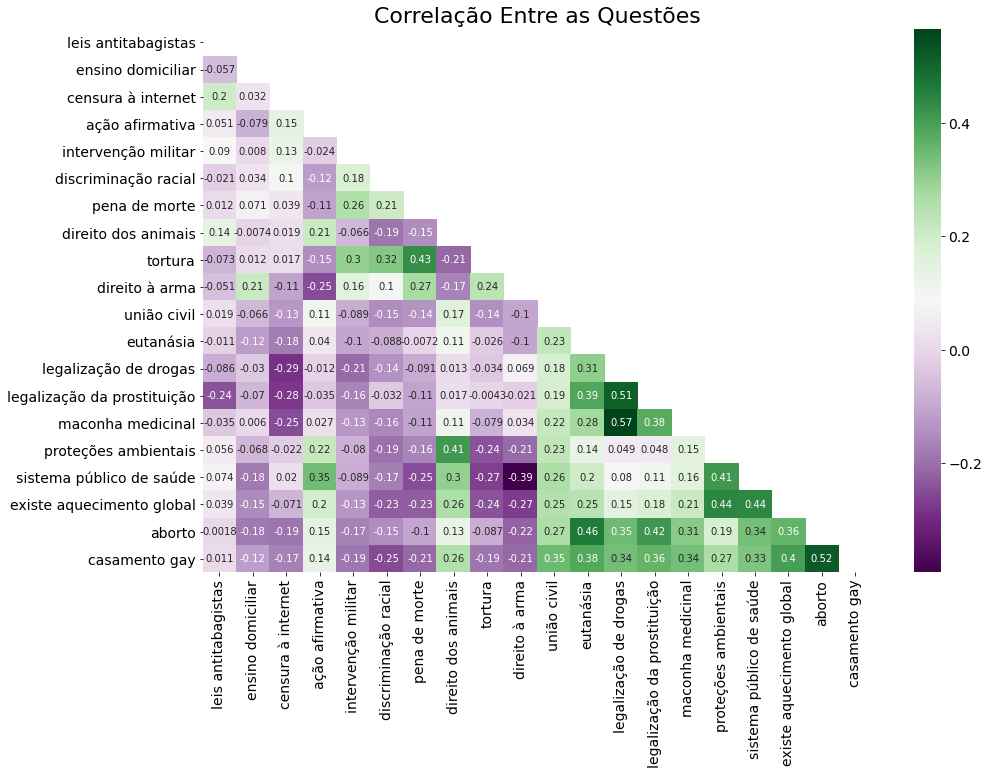

In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código da matrix de correlação)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]
for col in issuesN.columns:
  t = trans(col,translate)
  issuesN = issuesN.rename({col:t}, axis=1)
issuesN.head()
issuesN = issuesN.replace('N/O',int(0))
issuesN = issuesN.replace('Pro',int(1))
issuesN = issuesN.replace('Con',int(-1))
issuesN = issuesN.replace('Books:',int(0))
plt.rcParams["figure.figsize"] = (15,10)

sum_corr = abs(issuesN.corr()).sum().sort_values(ascending=True).index.values
matrix = np.triu(issuesN[sum_corr].corr(method='spearman'))
sns.heatmap(issuesN[sum_corr].corr(method='spearman'), annot=True, mask=matrix,cmap="PRGn").set_title("Correlação Entre as Questões", fontsize=22)
print('Método: Spearman. As questões foram consideradas como variáveis ordinais: pro=1; sem opinião=0; contra=-1./n/n ')

Para entender se existem agrupamentos bem definidos testamos a relação de agrupamento hieráquico entre as questões com diferentes thresholds. Com a ajuda de um dendograma podemos notar como essas questões ficaram agrupadas e que dependendo do threshold definido temos mais ou menos grupos. A visualização de onde eles se unem e separam nos auxiliou a definir como melhor parâmetro o threshold de 1.6 que divide as questões em 4 grupos definidos.

###<div align="right"><font color='teal'>Quantos grupos se formam?</font></div>
###<div align="right"><font color='teal'>Existe um tema em comum em cada grupo?</font></div>
###<div align="right"><font color='teal'>Quais variáveis estão mais proximamente conectdas e quais estão mais distantes?</font></div>

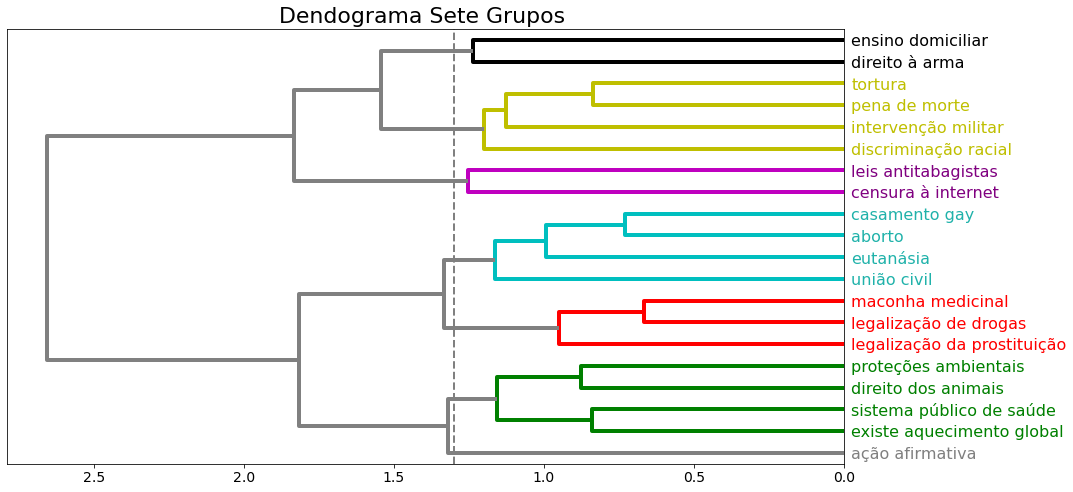

Técnica:Clusterização Hierárquica; Threshold:1.3


In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código do dendograma com sete grupos)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]
rcParams['figure.figsize'] = 15, 8
rcParams['lines.linewidth'] = 4

matrix = issuesN.corr(method='spearman')
Z = scipy.cluster.hierarchy.linkage(matrix, method='complete')

label_colors = {'aborto':'lightseagreen','pena de morte':'y', 'legalização de drogas':'red','casamento gay':'lightseagreen','direito à arma':'black','existe aquecimento global':'green', 
                'proteções ambientais':'green','maconha medicinal':'red','ação afirmativa':'grey','eutanásia':'lightseagreen','sistema público de saúde':'green',
                'discriminação racial':'y','direito dos animais':'green','ensino domiciliar':'black','tortura':'y','censura à internet':'purple','intervenção militar':'y',
                'leis antitabagistas':'purple','união civil':'lightseagreen','legalização da prostituição':'red'}

plt.title("Dendograma Sete Grupos ", fontsize=22)
scipy.cluster.hierarchy.dendrogram(Z,leaf_font_size=16, orientation="left",color_threshold=1.3, labels=issuesN.columns,above_threshold_color='grey')
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for i in range(20):
    xlbls[i].set_color(label_colors[xlbls[i].get_text()])
plt.axvline(x=1.3, c='grey', lw=2, linestyle='dashed')
plt.show()
print('Técnica:Clusterização Hierárquica; Threshold:1.3')

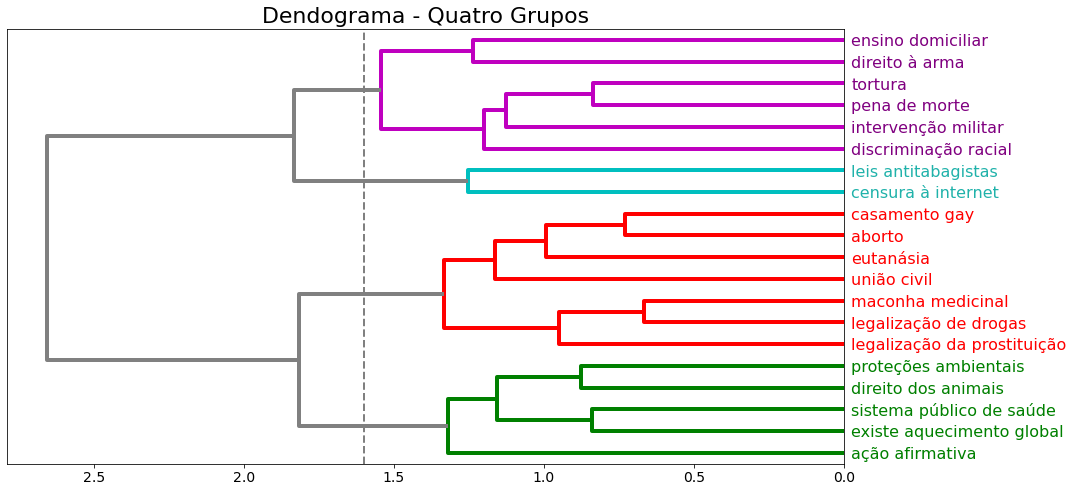

Técnica:Clusterização Hierárquica; Threshold:1.6


In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código do dendograma com quatro grupos)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]
label_colors = {'aborto':'red','pena de morte':'purple', 'legalização de drogas':'red','casamento gay':'red','direito à arma':'purple','existe aquecimento global':'green', 
                'proteções ambientais':'green','maconha medicinal':'red','ação afirmativa':'green','eutanásia':'red','sistema público de saúde':'green',
                'discriminação racial':'purple','direito dos animais':'green','ensino domiciliar':'purple','tortura':'purple','censura à internet':'lightseagreen','intervenção militar':'purple',
                'leis antitabagistas':'lightseagreen','união civil':'red','legalização da prostituição':'red'}

plt.title("Dendograma - Quatro Grupos", fontsize=22)
d = scipy.cluster.hierarchy.dendrogram(Z,leaf_font_size=16,  orientation="left",color_threshold=1.6,labels=issuesN.columns,above_threshold_color='grey')
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for i in range(20):
    xlbls[i].set_color(label_colors[xlbls[i].get_text()])
plt.axvline(x=1.6, c='grey', lw=2, linestyle='dashed')
plt.show()
print('Técnica:Clusterização Hierárquica; Threshold:1.6')

Além da relação hierárquica entre as questões é interessante verificar as distâncias e formatos dos grupos. Com uma tecnica de redução de dimenssionalidade e um agrupamento por aglomeração chegamos aos mesmos grupos que já haviamos encontrado anteriormente.

###<div align="right"><font color='teal'>Qual o formato de cada grupo?</font></div>
###<div align="right"><font color='teal'>Quais grupos estão mais aglomerados e quais estão mais dispersos?</font></div>
###<div align="right"><font color='teal'>Como um grupo se posiciona em relação ao outro?</font></div>
###<div align="right"><font color='teal'>Seguindo a direção dos eixos verticais e horizontais encontramos algum padrão relevante?</font></div>
###<div align="right"><font color='teal'>Qual a distância entre duas questões específicas?</font></div>

In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código da análise de clusterização)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]
X = matrix
pca = PCA(n_components = 2) 
X = pca.fit_transform(X) 
X = pd.DataFrame(X) 
X.columns = ['P1', 'P2'] 
ac2 = AgglomerativeClustering(n_clusters = 4) 
cluster= ac2.fit_predict(X)

cluster_color = [] 
for c in cluster:
  if c==0:cluster_color.append('red')
  if c==1:cluster_color.append('purple')
  if c==2:cluster_color.append('green')
  if c==3:cluster_color.append('lightseagreen')

points = matrix.columns
X['lab'] = points

fig = go.Figure(data=go.Scatter(
    x=X['P1'],
    y=X['P2'],
    text= X['lab'],
    textposition=["top right","top right","middle right","top right","middle left","bottom right","bottom center","top right","top right","bottom center",
                  "bottom center","bottom left","top center","top left","top right","top left","top center","top left","middle right","middle left"],
    textfont=dict(size=14,color=cluster_color),
    mode='markers+text',
    marker=dict(size=20, color=cluster_color, line=dict(width=2,color='black'),opacity=0.8 )
))
fig.update_xaxes(range=[-1.5, 1.5])
fig.update_yaxes(range=[-1.5, 1.5])

fig.update_layout(autosize=False,width=900,height=900,margin=dict(l=50,r=50,b=100,t=100,pad=4))
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(xaxis=dict(showgrid=True, zeroline=False, linewidth=2, gridcolor= "lightgray", linecolor= "gray", mirror=True),
                  yaxis=dict(showgrid=True, zeroline=False, linewidth=2, gridcolor= "lightgray", linecolor= "gray", mirror=True))
fig.update_layout(title="Agrupamento das Questões",xaxis_title="P1",yaxis_title="P2",font=dict(size=18))
fig.show()
print('Técnica: PCA, para a redução de dimensionalidade, e Clusterização Aglomerativa, para identificação dos grupos')

Técnica: PCA, para a redução de dimensionalidade, e Clusterização Aglomerativa, para identificação dos grupos


Finalizando a nossa análise coube entender melhor o perfil desses grupos. Com gráficos de Radar para os três principais grupos foi possível investigar isso mais à fundo e estabelecer comparações.

É possivel selecionar quais categorias queremos visualizar em cada gráfico.

###<div align="right"><font color='teal'>O que as questões dos grupos parecem ter em comum?</font></div>
###<div align="right"><font color='teal'>Qual o perfil desses grupos questões?</font></div>

In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código do gráfico de radar do grupo verde)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]
issuesStar = pd.DataFrame(list(zip(issue_col,count_prop,count_conp,count_nop)),
              columns=['issues','pro','con_p','no_p'])
#issuesStar = pro_con
issuesStar = issuesStar.set_index(['issues'])
green = issuesStar.loc[issuesStar.index.isin(['ação afirmativa', 'existe aquecimento global','sistema de saúde pública', 'direito dos animais','proteções ambientais'])]
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=green['pro'],theta=['ação afirmativa', 'existe aquecimento global','sistema de saúde pública', 'direito dos animais','proteções ambientais'],fill='toself', name='Pro'))
fig.add_trace(go.Scatterpolar(r=green['con_p'],theta=['ação afirmativa', 'existe aquecimento global','sistema de saúde pública', 'direito dos animais','proteções ambientais'],fill='toself',name='Contra'))
fig.add_trace(go.Scatterpolar(r=green['no_p'],theta=['ação afirmativa', 'existe aquecimento global','sistema de saúde pública', 'direitos dos animais','proteções ambientais'],fill='toself',name='Sem Opinião'))
fig.update_layout(polar=dict(radialaxis=dict(visible=True,showticklabels=True,gridcolor='darkgrey',ticksuffix='%',tickfont=dict(size=12,color="dimgrey"),range=[0, 80])),showlegend=True)
fig.update_layout(polar=dict(angularaxis=dict(gridcolor='darkgrey',linecolor='darkgrey',showline= True,showgrid=True,gridwidth=1.5)))
fig.update_layout(font=dict(size=16,color='green'))
fig.update_layout(title=dict(text="Perfil do Grupo Verde",font=dict(size=22,color='black')))
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.04,xanchor="right",x=0.26,font=dict(size=12,color='black')))

fig.show()

In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código do gráfico de radar do grupo vermelho)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]
red = issuesStar.loc[issuesStar.index.isin(['casamento gay','aborto','eutanásia','união civil','maconha medicinal','legalização de drogas','legalização da prostituição'])]
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=red['pro'],theta=['casamento gay','aborto','eutanásia','união civil','maconha medicinal','legalização de drogas','legalização da prostituição'],fill='toself', name='Pro'))
fig.add_trace(go.Scatterpolar(r=red['con_p'],theta=['casamento gay','aborto','eutanásia','união civil','maconha medicinal','legalização de drogas','legalização da prostituição'],fill='toself',name='Contra'))
fig.add_trace(go.Scatterpolar(r=red['no_p'],theta=['casamento gay','aborto','eutanásia','união civil','maconha medicinal','legalização de drogas','legalização da prostituição'],fill='toself',name='Sem Opinião'))
fig.update_layout(polar=dict(radialaxis=dict(visible=True,showticklabels=True,gridcolor='darkgrey',ticksuffix='%',tickfont=dict(size=12,color="dimgrey"),range=[0, 80])),showlegend=True)
fig.update_layout(polar=dict(angularaxis=dict(gridcolor='darkgrey',linecolor='darkgrey',showline= True,showgrid=True,gridwidth=1.5)))
fig.update_layout(font=dict(size=16,color='firebrick'))
fig.update_layout(title=dict(text="Perfil do Grupo Vermelho",font=dict(size=22,color='black')))
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.04,xanchor="right",x=0.26,font=dict(size=12,color='black')))

fig.show()

In [ ]:
#@title ######<sub><sup>(clique aqui para ver o código do gráfico de radar do grupo roxo)</sup></sub>
# para ocultar o código da célula basta com o mouse sob o texto da linha de cima clicar com a direita ir na opção [formulário] e depois em [ocultar código]
purple = issuesStar.loc[issuesStar.index.isin(['ensino domiciliar','direito à arma','tortura','pena de morte','intervenção militar','discriminação racial'])]
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=purple['pro'],theta=['ensino domiciliar','direito à arma','tortura','pena de morte','intervenção militar','discriminação racial'],fill='toself', name='Pro'))
fig.add_trace(go.Scatterpolar(r=purple['con_p'],theta=['ensino domiciliar','direito à arma','tortura','pena de morte','intervenção militar','discriminação racial'],fill='toself',name='Contra'))
fig.add_trace(go.Scatterpolar(r=purple['no_p'],theta=['ensino domiciliar','direito à arma','tortura','pena de morte','intervenção militar','discriminação racial'],fill='toself',name='Sem Opinião'))
fig.update_layout(polar=dict(radialaxis=dict(visible=True,showticklabels=True,gridcolor='darkgrey',ticksuffix='%',tickfont=dict(size=12,color="dimgrey"),range=[0, 80])),showlegend=True)
fig.update_layout(polar=dict(angularaxis=dict(gridcolor='darkgrey',linecolor='darkgrey',showline= True,showgrid=True,gridwidth=1.5)))
fig.update_layout(font=dict(size=16,color='rebeccapurple'))
fig.update_layout(title=dict(text="Perfil do Grupo Roxo",font=dict(size=22,color='black')))
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.04,xanchor="right",x=0.26,font=dict(size=12,color='black')))

fig.show()

Apesar das visualizações seguirem um ordem lógica é muito útil revisitar algumas delas ao tentar validar ou criar insights ao longo da análise. Principalmente ao lidar com questões tão polêmicas devemos estar a par do nosso viés e procurar manter uma mente aberta, sem ingênuamente atribuir causa à correlações encontradas.